Assignment: **Comparing linear and non-linear DR** 

Compare PCA and t-SNE methods by visualizing Bike Sharing Rental dataset. Explore how
the different features are shown in the DR components. Build a simple prediction model (for
example, MLP or Random Forest) to predict the count of total rental bikes and compare the
performance of the model with the different DR techniques.

**Load dataset**

In [80]:
from scipy.io import arff
import pandas as pd

# Load the ARFF file
data, meta = arff.loadarff('dataset.arff')

# Convert to pandas DataFrame
df = pd.DataFrame(data)

# If some columns are byte strings, convert them to normal strings
df = df.map(lambda x: x.decode() if isinstance(x, bytes) else x)

# Show first rows
print(df.head())

# Print data shape
print("Data shape = ", df.shape)


   season  year  month  hour holiday  weekday workingday weather  temp  \
0  spring   0.0    1.0   0.0   False      6.0      False   clear  9.84   
1  spring   0.0    1.0   1.0   False      6.0      False   clear  9.02   
2  spring   0.0    1.0   2.0   False      6.0      False   clear  9.02   
3  spring   0.0    1.0   3.0   False      6.0      False   clear  9.84   
4  spring   0.0    1.0   4.0   False      6.0      False   clear  9.84   

   feel_temp  humidity  windspeed  casual  registered  count  
0     14.395      0.81        0.0     3.0        13.0   16.0  
1     13.635      0.80        0.0     8.0        32.0   40.0  
2     13.635      0.80        0.0     5.0        27.0   32.0  
3     14.395      0.75        0.0     3.0        10.0   13.0  
4     14.395      0.75        0.0     0.0         1.0    1.0  
Data shape =  (17379, 15)


**Investigate data**

In [81]:
import numpy as np

print(np.unique(df["weather"]))
print(np.unique(df["workingday"]))
print(np.unique(df["holiday"]))
print(np.unique(df["season"]))

# Any nan in data?
print("Any nan in data? - ", df.isna().any().any())

['clear' 'heavy_rain' 'misty' 'rain']
['False' 'True']
['False' 'True']
['fall' 'spring' 'summer' 'winter']
Any nan in data? -  False


PCA can't process strings, therefore we need to convert this strings to numbers.

In [82]:
df["workingday"] = df["workingday"].map({"False": 0, "True": 1})
df["holiday"] = df["holiday"].map({"False": 0, "True": 1})
df["weather"] = df["weather"].map({"clear": 0, "misty": 1, "rain": 2, "heavy_rain": 3})
df["season"] = df["season"].map({"spring": 0, "summer": 1, "fall": 2, "winter": 3})

print(df.head())

   season  year  month  hour  holiday  weekday  workingday  weather  temp  \
0       0   0.0    1.0   0.0        0      6.0           0        0  9.84   
1       0   0.0    1.0   1.0        0      6.0           0        0  9.02   
2       0   0.0    1.0   2.0        0      6.0           0        0  9.02   
3       0   0.0    1.0   3.0        0      6.0           0        0  9.84   
4       0   0.0    1.0   4.0        0      6.0           0        0  9.84   

   feel_temp  humidity  windspeed  casual  registered  count  
0     14.395      0.81        0.0     3.0        13.0   16.0  
1     13.635      0.80        0.0     8.0        32.0   40.0  
2     13.635      0.80        0.0     5.0        27.0   32.0  
3     14.395      0.75        0.0     3.0        10.0   13.0  
4     14.395      0.75        0.0     0.0         1.0    1.0  


Remove casual, registered and count, so we can later predict count

In [83]:
features_names_orig = df.columns
df_modified = df.drop(columns=["casual", "registered", "count"])
print(df_modified.head())
features_names_mod = df_modified.columns

   season  year  month  hour  holiday  weekday  workingday  weather  temp  \
0       0   0.0    1.0   0.0        0      6.0           0        0  9.84   
1       0   0.0    1.0   1.0        0      6.0           0        0  9.02   
2       0   0.0    1.0   2.0        0      6.0           0        0  9.02   
3       0   0.0    1.0   3.0        0      6.0           0        0  9.84   
4       0   0.0    1.0   4.0        0      6.0           0        0  9.84   

   feel_temp  humidity  windspeed  
0     14.395      0.81        0.0  
1     13.635      0.80        0.0  
2     13.635      0.80        0.0  
3     14.395      0.75        0.0  
4     14.395      0.75        0.0  


**Standardize data**

In [84]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(df_modified)

Dataset prepared, lets compute **PLC**

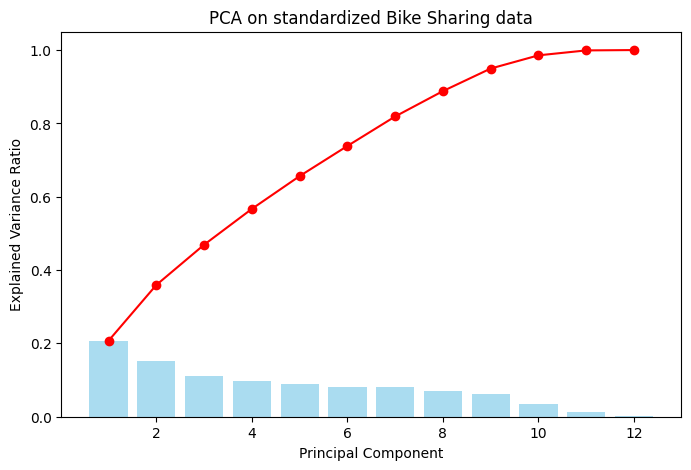

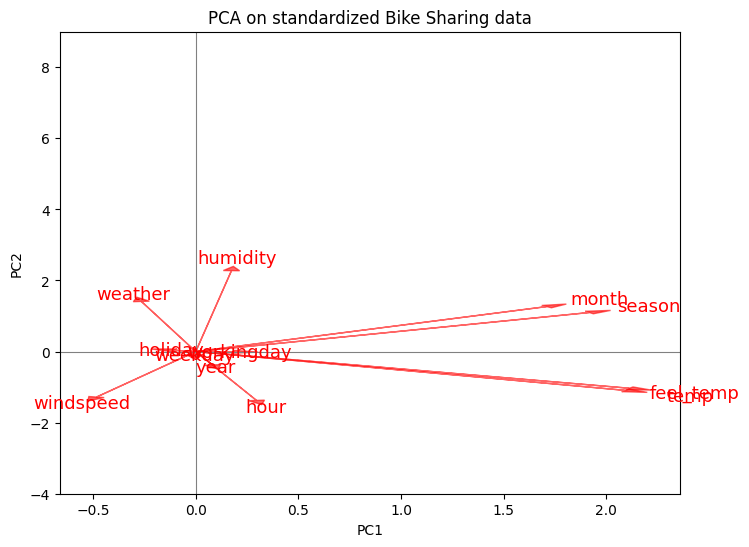

In [85]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=12)
scores = pca.fit_transform(X_std)
coeff = pca.components_.T

explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(8,5))
plt.bar(range(1, len(explained_variance)+1), explained_variance, alpha=0.7, color='skyblue')
plt.plot(range(1, len(explained_variance)+1), np.cumsum(explained_variance), marker='o', color='red')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
title = "PCA on standardized Bike Sharing data"
plt.title(title)
plt.show()

# Biplot (PC1 vs PC2)
plt.figure(figsize=(8,6))

scale = max(scores[:,0].max(), scores[:,1].max())

for i in range(len(features_names_mod)):
    plt.arrow(0, 0, coeff[i,0]*scale, coeff[i,1]*scale, color='r', alpha=0.6, head_width=0.02*scale)
    plt.text(coeff[i,0]*scale*1.15, coeff[i,1]*scale*1.15, features_names_mod[i], color='r', ha='center', va='center', fontsize=13)

plt.xlabel(f"PC1")
plt.ylabel(f"PC2")
plt.title(title)
plt.axhline(0, color='grey', linewidth=0.8)
plt.axvline(0, color='grey', linewidth=0.8)
plt.ylim((-4, 9))
plt.show()

Plot PCA scores

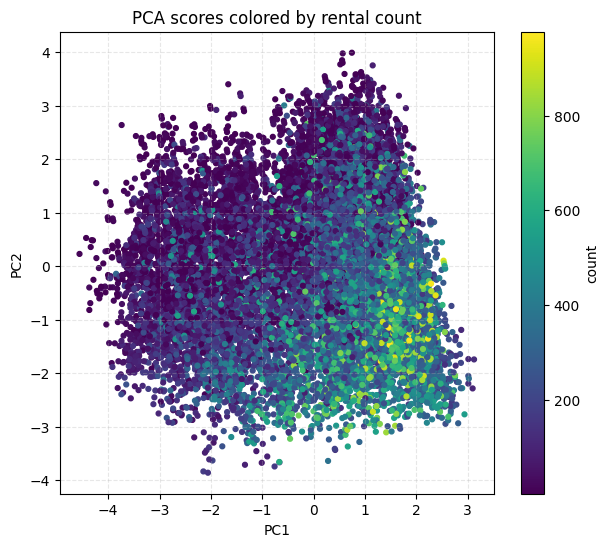

In [86]:
# Scores
PC = pd.DataFrame(scores[:, :2], columns=["PC1","PC2"], index=df.index)

# count
y_count = df["count"].values

# scatter + colorbar
plt.figure(figsize=(7,6))
sc = plt.scatter(PC["PC1"], PC["PC2"], c=y_count, s=12)
plt.colorbar(sc, label="count")
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.title("PCA scores colored by rental count")
plt.grid(True, ls="--", alpha=0.3)
plt.show()


Observation:

From this, we can see that the scores for the days with the highest number of bike rentals are mostly located in the lower-right part of the plot. If we now take into account the biplot above, we can observe that this area correlates positively with temperature and negatively with weather conditions, wind speed, and air humidity. Its also important to mention that first two components explain only 40% of variance.

**TSNE**

In [87]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=15, random_state=42)
X_tsne = tsne.fit_transform(X_std)


In [88]:
pd.DataFrame(X_tsne, columns=["TSNE1","TSNE2"]).assign(**df).corr()

,TSNE1,TSNE2,season,year,month,hour,holiday,weekday,workingday,weather,temp,feel_temp,humidity,windspeed,casual,registered,count
TSNE1,1.000000,-0.024902,0.735634,0.187506,0.572427,-0.005334,-0.067410,-0.076298,0.257339,-0.256261,0.397756,0.403741,0.051918,-0.161661,0.100909,0.257955,0.242677
TSNE2,-0.024902,1.000000,0.307671,-0.292709,0.393218,-0.040262,0.036034,-0.056833,-0.108633,0.643295,-0.125064,-0.118051,0.360774,-0.051203,-0.082780,-0.143702,-0.142412
season,0.735634,0.307671,1.000000,-0.010742,0.830386,-0.006117,-0.009585,-0.002335,0.013743,-0.014524,0.312025,0.319380,0.150625,-0.149773,0.120206,0.174226,0.178056
year,0.187506,-0.292709,-0.010742,1.000000,-0.010473,-0.003867,0.006692,-0.004485,-0.002196,-0.019157,0.040913,0.039222,-0.083546,-0.008740,0.142779,0.253684,0.250495
month,0.572427,0.393218,0.830386,-0.010473,1.000000,-0.005772,0.018430,0.010400,-0.003477,0.005400,0.201691,0.208096,0.164411,-0.135386,0.068457,0.122273,0.120638
hour,-0.005334,-0.040262,-0.006117,-0.003867,-0.005772,1.000000,0.000479,-0.003498,0.002285,-0.020203,0.137603,0.133750,-0.276498,0.137252,0.301202,0.374141,0.394071
holiday,-0.067410,0.036034,-0.009585,0.006692,0.018430,0.000479,1.000000,-0.102088,-0.252471,-0.017036,-0.027340,-0.030973,-0.010588,0.003988,0.031564,-0.047345,-0.030927
weekday,-0.076298,-0.056833,-0.002335,-0.004485,0.010400,-0.003498,-0.102088,1.000000,0.035955,0.003311,-0.001795,-0.008821,-0.037158,0.011502,0.032721,0.021578,0.026900
workingday,0.257339,-0.108633,0.013743,-0.002196,-0.003477,0.002285,-0.252471,0.035955,1.000000,0.044672,0.055390,0.054667,0.015688,-0.011830,-0.300942,0.134326,0.030284
weather,-0.256261,0.643295,-0.014524,-0.019157,0.005400,-0.020203,-0.017036,0.003311,0.044672,1.000000,-0.102640,-0.105563,0.418130,0.026226,-0.152628,-0.120966,-0.142426


Observation:

From this, it can be seen that the current season and month have the greatest influence on TSNE1, followed by temperature, weather conditions, and whether it is a working day. Weather also had the strongest influence on TSNE2.

In [89]:
TS = pd.DataFrame(X_tsne, columns=["TSNE1", "TSNE2"], index=df.index)
y_count = df["count"]

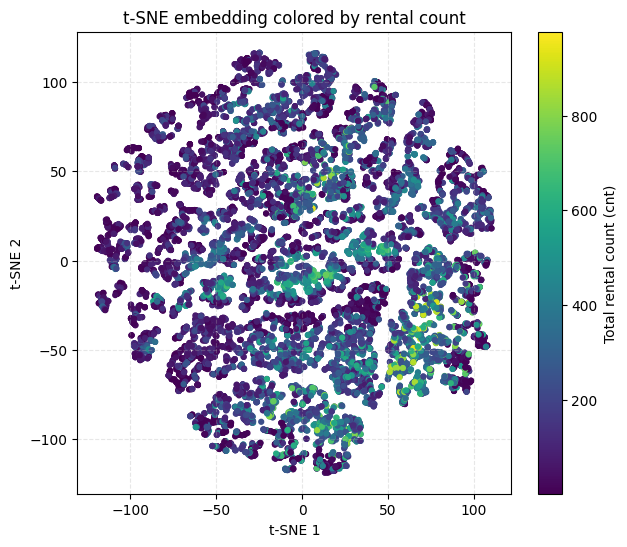

In [90]:
plt.figure(figsize=(7,6))
sc = plt.scatter(TS["TSNE1"], TS["TSNE2"], c=y_count, s=12, cmap="viridis")
plt.colorbar(sc, label="Total rental count (cnt)")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.title("t-SNE embedding colored by rental count")
plt.grid(True, linestyle="--", alpha=0.3)
plt.show()

Observation:

I am not entirely sure how to interpret this result. Days with a higher number of rented bikes seem to cluster in a similar region of the plot, but beyond that, the structure is difficult to interpret. It is also possible that I chose an unsuitable perplexity value, which could have affected the layout of the t-SNE visualization.


**Prediction model - Random Forest**

R2: 0.2356823037821938
MAE: 115.88999700326043
RMSE: 155.5713156159252


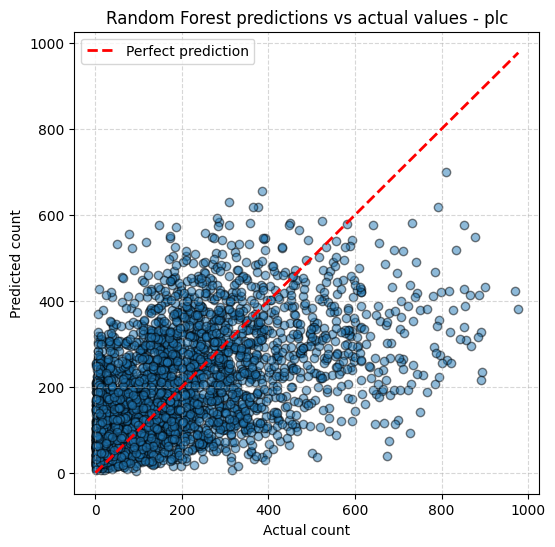

R2: 0.6043316072486674
MAE: 73.96587394514769
RMSE: 111.93302644575309


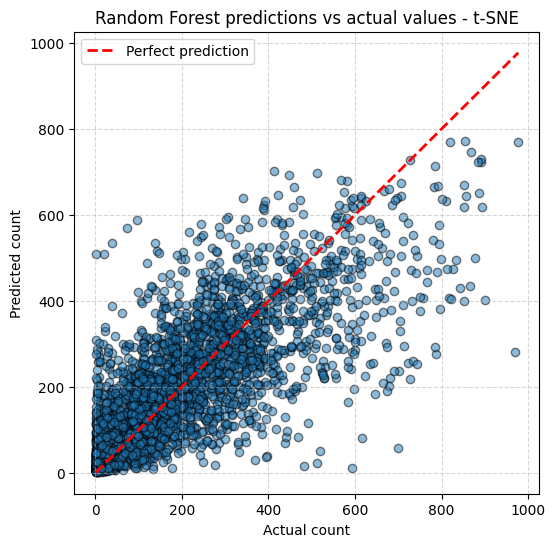

R2: 0.9441469753068092
MAE: 24.894225139048718
RMSE: 42.054833269139955


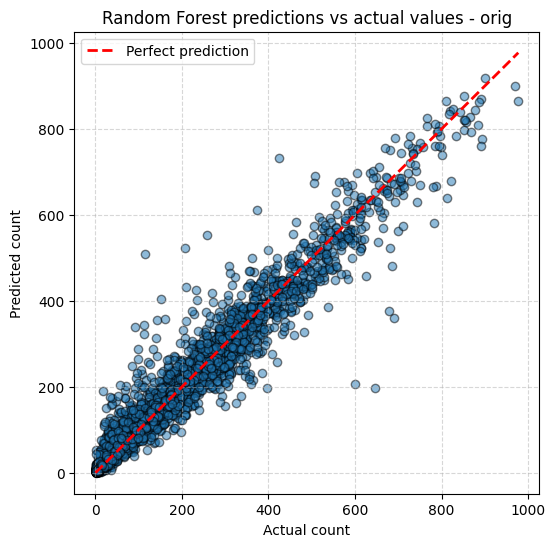

In [91]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, root_mean_squared_error

def predict_and_evaluate_count(X, y, data_name):

    # Split dataset to train/test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train model
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    # Evaluate
    print("R2:", r2_score(y_test, preds))
    print("MAE:", mean_absolute_error(y_test, preds))
    print("RMSE:", root_mean_squared_error(y_test, preds))

    plt.figure(figsize=(6,6))
    plt.scatter(y_test, preds, alpha=0.5, edgecolor='k')
    plt.plot([y_test.min(), y_test.max()],
            [y_test.min(), y_test.max()],
            'r--', lw=2, label='Perfect prediction')
    plt.xlabel("Actual count")
    plt.ylabel("Predicted count")
    plt.title(f"Random Forest predictions vs actual values - {data_name}")
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

predict_and_evaluate_count(X=PC, y=df["count"], data_name="plc")
predict_and_evaluate_count(X=TS, y=df["count"], data_name="t-SNE")
predict_and_evaluate_count(X=df_modified, y=df["count"], data_name="orig")

Prediction results:

The three plots above show the prediction of the total bike count based on different input data. The first model uses the first and second principal components, the second is based on the first and second t-SNE components, and the last one is trained on the original features. As expected, the model trained on the original data achieved the best performance, followed by the one based on t-SNE, while the PCA-based model performed the worst. This is reasonable, since PCA can capture only linear relationships in the data. However, if we would increase the number of components, the results could improve significantly.